This notebook eplores thermodynamic quantities using jupyter technology. As you read through the text, you can execute the code blocks. You can change input (for example, choose different axis ranges or scaling or select different species to show in the plots). You can right-click or control-click on figures to save them. If your current version gets corrupted, don't worry. Simply quit and download a new copy from GitHub, or start up a new version on Google Colab or Binder

##Table of Contents 
[Introduction](#a)<br/>
[Loading in the data](#b)<br/>
[Plotting the electric chemical potential](#c)<br/>
[Plotting pressure components](#d)<br/>
[Plotting entropy](#e)<br/>

<a id='a'></a>
#Introduction 



For low mass stars, ($<10$ $M_\odot$) main-sequence nuclear fusion terminates with core Helium burning. After this phase,
 the star will contract and increase in pressure but not reach a high enough temperature to begin the next nuclear burning phase. If conditions occur that allow the star to tap into the remaining nuclear fuel of Carbon and Oxygen, then the star experiences a thermonuclear runaway called a type Ia supernova. 


The following notebook will focus on the thermodynamic quantities in the star and how they effect the explosive nucleosynthesis yields. .


<a id='b'></a>
##Loading in data 


The following loads in data from osf and imports the necessary python libraries. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import sys
!curl -o out.h5 -J -L https://osf.io/psabg/download
f = h5py.File('out.h5','r')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1330      0 --:--:-- --:--:-- --:--:--  1326
100 5203k  100 5203k    0     0  1264k      0  0:00:04  0:00:04 --:--:-- 2129k


<a id='c'></a>
##Plotting electron chemical potentials 

First let's examine how the chemical potential changes as a function of temperature. The electron chemical potential for a gas of a given composition is the free energy cost to add an electron to that gas. Below shows the electron chemical potential for a gas of ionized Hydrogen with a similar density as the center of the Sun. At temperatures similar to that of the center of the sun the gas is non-degenerate, but at lower temperatures the gas becomes highly degenerate. 

The chemical potential rises again at temperature higher than around $10^9$ K as a result of photons interacting to create electron-positrion pairs. 

We first input the parameters for the type of gas we are interested in and the plot parameters. 

In [ ]:
#The following variables describe the same thing throughout the rest of the notebook and can be modified accordingly 
#for each section 

group = 'H'  #Composition of the gas of interest
rho_index = 76  #Density of the gas of interest

#Plot parameters
x_low = 1000  
x_high = 1e11
y_low = -10
y_high = 50  
n_x_ticks = 9
x_label = 'T (K)'
y_label = '${\mu_e}\prime\^k_B T$'
y_scale = 'linear'
bw = False #Decides if the plot will be in black and white or color
output_pdf = 'muekT_H_76.pdf' #Title of the pdf that will be generated of your plot

We then pull the data we need from the h5 file. This includes the temperature, density, and the thermodynamic quantity.

In [ ]:
t9 = f['T9 and rho/T9'][:]
T = t9*1e9
rho = f['T9 and rho/rho']

#The variable 'prop' describes which thermodynamic quantity of interest you are 
#plotting. This will already be changed accordingly for each section
prop = f[group + '/electron chemical potential in kT']

Finally we plot the data:

Text(0.5, 1.0, '$\\rho= $ 1.57e+02 $g/cm^3$')

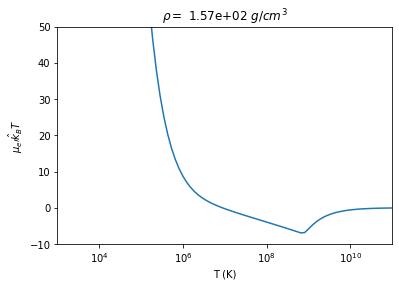

In [ ]:
#For bw==True the plot will be returned in black and white 
if bw==True:
  plt.plot(T, prop[:,rho_index], color = 'black')
else:
  plt.plot(T, prop[:,rho_index])

plt.xscale('log')
plt.yscale(y_scale)
plt.xlim([x_low,x_high])
plt.ylim([y_low,y_high])

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.savefig(output_pdf)
title_str = '$\\rho= $ {:.2e} $g/cm^3$'.format(rho[rho_index])
plt.title(title_str)

Let's now consider a gas of $^{12}$C and $^{16}$O at a density of $1.59\times 10^9$ $g/cm^3$ (Roughly the conditions of a white dwarf star). The conditions of this gas are never that of a dilute non-relativistic gas. It is highly degenerate for temperature less than 10 billion Kelvin and highly relativistic for temperature that are higher. 

We again start with defining the parameters of the gas of interest.


In [ ]:
group = 'C+O'
rho_index = 150
x_low = 1e7
x_high = 1e11
y_low = 0
y_high = 1000
n_x_ticks = 9
x_label = 'T (K)'
y_label = '${\mu_e}\prime\^k_B T$'
y_scale = 'linear'
bw = False
output_pdf = 'muekT_H_76.pdf'

We then pull the chemical potential for the gas of carbon and oxygen. 

In [ ]:
prop = f[group + '/electron chemical potential in kT']

Finally we plot the data:

Text(0.5, 1.0, '$\\rho= $ 1.59e+09 $g/cm^3$')

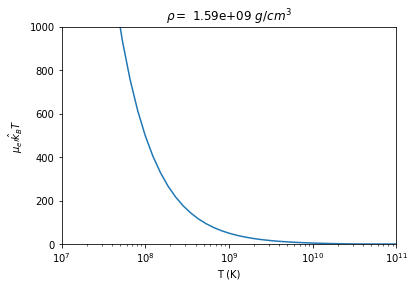

In [ ]:
if bw==True:
  plt.plot(T, prop[:,rho_index], color = 'black')
else:
  plt.plot(T, prop[:,rho_index])

plt.xscale('log')
plt.yscale(y_scale)
plt.xlim([x_low,x_high])
plt.ylim([y_low,y_high])

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.savefig(output_pdf)
title_str = '$\\rho= $ {:.2e} $g/cm^3$'.format(rho[rho_index])
plt.title(title_str)

<a id='d'></a>
##Plotting pressure components


The pressure in a star is the force per unit area being exerted by the gas on its surroundings. The following plot is a gas of $^{12}$C and $^{16}$O with the around the pressure expected in a white dwarf. The important feature of this plot is the insensitivity of the pressure to temperature below 10 billion Kelvin. This insensitivity is created by the degenerate conditions discussed in the above section. Under non-degenerate conditions an increase in temperature creates a subsequent increase in pressure, causing the star to expand and cool. In degenerate conditions the insensitivity allows for the star to continue to heat without expanding, which increases the nuclear reaction rate. This process causes the star to rapidly heat to the point in which it is able to expand--this is the mechanism of a thermonuclear runaway. 


First, we input the parameters needed to get the data for the pressure components of a gas of carbon and oxygen. 

In [ ]:
group = 'C+O'
thermo_quantity = 'pressure'
rho_index = 150
x_low = 1e6
x_high = 1e11
y_low = 1e24
y_high = 1e30
n_x_ticks = 9
x_label = 'T (K)'
y_label = 'Pressure (dynes/cm$^2$'
bw = False
output_pdf = 'pressure_H_components.pdf'


To get the pressure components for all matter within the star, we need to declare the different species that contribute to the pressure and pull the data for each of them. These are the photons, baryons, and electrons:

In [ ]:
s = ['baryon', 'electron', 'photon', 'total']
sl = ['baryons', 'electrons', 'photons', 'total']

tq = {} 

for sq in s:
  tq[sq] = f[group + '/' + sq  + ' ' + thermo_quantity]

Then we plot the data:

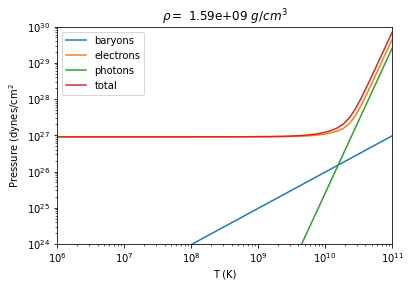

In [ ]:
linest = ['-.', '--', ':', '-'] #line types for black and white plot 

for i in range(len(s)):
  if bw==True:
    plt.plot(T, tq[s[i]][:,rho_index],linest[i], color = 'black', label = sl[i])

  else:
    plt.plot(T, tq[s[i]][:,rho_index], label = sl[i])

plt.xscale('log')
plt.yscale('log')

plt.xlim([x_low,x_high])
plt.ylim([y_low,y_high])

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.savefig(output_pdf)
title_str = '$\\rho = $ {:.2e} $g/cm^3$'.format(rho[rho_index])
plt.title(title_str)
plt.legend()

<a id='e'></a>
##Plot entropy 

The entropy per nucleon of a gas can be an easy way to estimate the yields of explosive nucleosynthesis in a gas if the composition of the gas and the temperature are known. There are two general rules of thumb to aid with this analysis. The first is that the entropy per nucleon characterizes the state of the matter present: low entropy per nucleon (less than 1 $k_B$) suggests highly degenerate matter, moderate entropy per nucleon (between 5-50 $k_B$) suggests non-relativistic dilute conditions, finally high entropy per nucleon ($>50 k_B$) suggests relativistic conditions. The second rule of thumb is that for a given entropy, higher temperatures mean a higher number of light particles. The figure below shows the entropy per nucleon of a gas of carbon and oxygen at a density of $1.59 \times 10^9$ $g/cm^3$ as a function of temperature. 


First, we declare the parameters for a gas of carbon and oxygen 

In [ ]:
group = 'C+O'
thermo_quantity = 'entropy per nucleon'
rho_index = 150
x_low = 1e5
x_high = 1e11
y_low = 1e-2
y_high = 1e2
n_x_ticks = 9
x_label = 'T (K)'
y_label = 'Entropy per nucleon ($k_B$)'
bw = False
output_pdf = 'entropy_H_components_76.pdf'

Then, we pull the entropy data for each of the species:

In [ ]:
tq = {} 

for sq in s:
  tq[sq] = f[group + '/' + sq  + ' ' + thermo_quantity]

Finally, we plot the data:

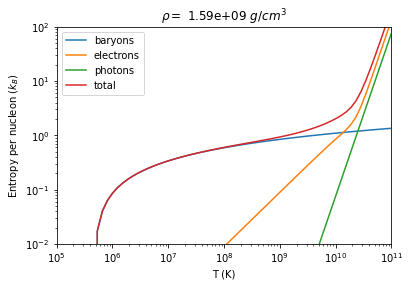

In [ ]:
for i in range(len(s)):
  if bw==True:
    plt.plot(T, tq[s[i]][:,rho_index],linest[i], color = 'black', label = sl[i])

  else:
    plt.plot(T, tq[s[i]][:,rho_index], label = sl[i])

plt.xscale('log')
plt.yscale('log')

plt.xlim([x_low,x_high])
plt.ylim([y_low,y_high])

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.savefig(output_pdf)
title_str = '$\\rho = $ {:.2e} $g/cm^3$'.format(rho[rho_index])
plt.title(title_str)
plt.legend()